In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# Error vs Iterations 

Deprecated

c:\users\jianhong\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Saved as: Exp_Data/Graphs/2-Batch on branin function (median, 30 seed)_IR.png
Saved as: Exp_Data/Graphs/2-Batch on branin function (median, 30 seed)_L2.png


<Figure size 432x288 with 0 Axes>

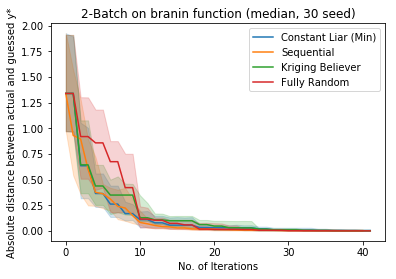

<Figure size 432x288 with 0 Axes>

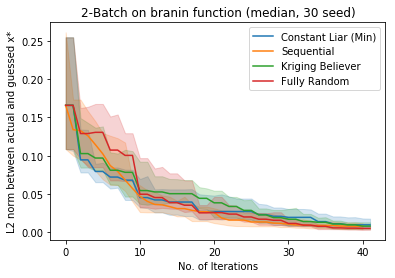

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 19 14:56:44 2018

@author: jianhong

import numpy as np
import seaborn as sns
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

seed_size = 30
batch_sizes = [2]
test_funcs = ["branin"]
metrics = ["IR", "L2"]
save_file = True

plot_choice = {
        "seq_results": 1, 
        "random_results": 1,
        "random1_results": 0,
        "kb_results": 1,
        "cl_mean_results": 0, 
        "cl_min_results": 1,
        "cl_max_results": 0
        }

label_lookup = {
        "seq_results": "Sequential", 
        "random_results": "Fully Random",
        "random1_results": "Random excl. 1st",
        "kb_results": "Kriging Believer",
        "cl_mean_results": "Constant Liar (Mean)", 
        "cl_min_results": "Constant Liar (Min)",
        "cl_max_results": "Constant Liar (Max)"
        }

metric_lookup = {
        "L2": "L2 norm between actual and guessed x*",
        "IR": "Absolute distance between actual and guessed y*",
        }

estimator = "mean"
estimator = np.median

#####
# 1. Error against number of iterations
#####

def error_vs_iterations(func = "egg", seed_size = 2, metrics = "IR", batch = False, batch_size = 2, heuristic = "kb"):
    if batch == False:
        dir_name = "Exp_Data/" + func + "," + str(seed_size) + "_seed," + str(batch_size) + "_batch_size/"
        filename = "A_results_" + metrics + ",sequential.npy"
        results = np.load(dir_name + filename)
    else:
        dir_name = "Exp_Data/" + func + "," + str(seed_size) + "_seed," + str(batch_size) + "_batch_size/"
        filename = "A_results_" + metrics + "," + heuristic + "_heuristic.npy"
        results = np.load(dir_name + filename)
        results = np.repeat(results, repeats = batch_size * np.ones(results.shape[1], dtype = int), axis = 1)
    
    df = pd.DataFrame(results)
    df = df.stack()
    df = df.to_frame()
    df.index.names = (['seed', 'iters'])
    df.columns = ['values']
    df.reset_index(inplace = True)
    return df
    
    #return results, seed_size, num_iterations
    
if estimator == np.median:
    estimator_title = "median"
else:
    estimator_title = "mean"

def plot_error_vs_iterations(seed_size, batch_sizes, test_funcs, metrics, plot_choice, save_file):   
    # Loads, plots and saves graphs     
    for metric in metrics:
        plt.figure() # New figure
        
        for batch_size in batch_sizes:
            plt.figure() # New figure
            
            for func in test_funcs:
                try: 
                    seq_results = error_vs_iterations(batch = False, metrics = metric, func = func, batch_size = batch_size, seed_size = seed_size)    
                except: pass
                try:
                    random_results = error_vs_iterations(func = func, metrics = metric, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "random")
                except: pass
                try:
                    random1_results = error_vs_iterations(func = func, metrics = metric, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "random_except_1st")
                except: pass
                try:
                    kb_results = error_vs_iterations(func = func, metrics = metric, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "kb")
                except: pass
                try:
                    cl_mean_results = error_vs_iterations(func = func, metrics = metric, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "cl-mean")
                except: pass
                try:
                    cl_min_results = error_vs_iterations(func = func, metrics = metric, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "cl-min")
                except: pass
                try:
                    cl_max_results = error_vs_iterations(func = func, metrics = metric, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "cl-max")
                except: pass
                
                for key, value in plot_choice.items():
                    if value == 1:
                        fig = sns.lineplot(x = 'iters', y = 'values', data = eval(key), err_style = "band", \
                                           label = label_lookup[key], estimator = estimator)
                
                graph_title = str(batch_size) + "-Batch on "+ str(func) + " function (" + estimator_title + ", " + str(seed_size) + " seed)"
                fig.set(xlabel = "No. of Iterations", ylabel = metric_lookup[metric], title = graph_title)
                save_path = "Exp_Data/Graphs/" + graph_title + "_" + str(metric) + ".png"
                fig2 = fig.get_figure()
               
                if save_file:
                    print("Saved as: " + save_path)
                    fig2.savefig(save_path)

plot_error_vs_iterations(seed_size, batch_sizes, test_funcs, metrics, plot_choice, save_file)
"""

Version 2

c:\users\jianhong\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

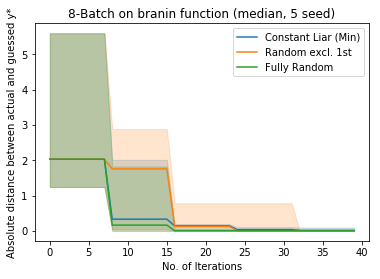

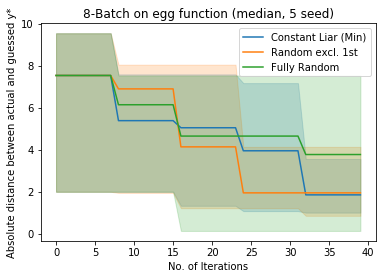

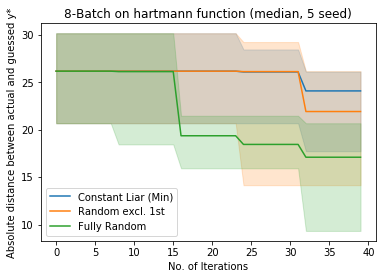

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

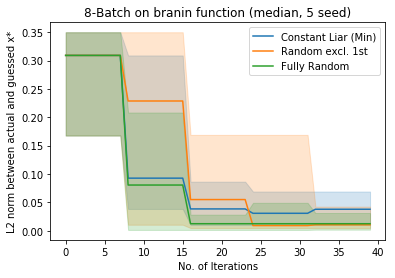

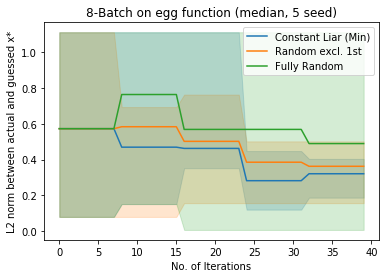

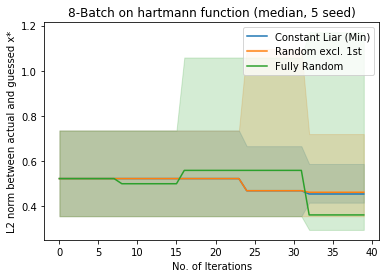

In [29]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 19 14:56:44 2018

@author: jianhong
"""
seed_size = 5
batch_sizes = [8]
test_funcs = ["branin", "egg", "hartmann"]
#test_funcs = ["branin"]
metrics = ["IR", "L2"]
save_file = False

plot_choice = {
        "seq_results": 0, 
        "random_results": 1,
        "random1_results": 1,
        "kb_results": 0,
        "cl_mean_results": 0, 
        "cl_min_results": 1,
        "cl_max_results": 0
        }

label_lookup = {
        "seq_results": "Sequential", 
        "random_results": "Fully Random",
        "random1_results": "Random excl. 1st",
        "kb_results": "Kriging Believer",
        "cl_mean_results": "Constant Liar (Mean)", 
        "cl_min_results": "Constant Liar (Min)",
        "cl_max_results": "Constant Liar (Max)"
        }

metric_lookup = {
        "L2": "L2 norm between actual and guessed x*",
        "IR": "Absolute distance between actual and guessed y*",
        }

estimator = "mean"
estimator = np.median

#####
# 1. Error against number of iterations
#####

def error_vs_iterations_v2(func = "egg", seed_size = 2, metrics = "IR", batch = False, batch_size = 2, heuristic = "kb"):
    if batch == False:
        dir_name = "Exp_Data/" + func + "," + str(seed_size) + "_seed,sequential" 
        filename = "A_results_" + metrics + ",sequential.npy"
        results = np.load(dir_name + filename)
    else:
        dir_name = "Exp_Data/" + func + "," + str(seed_size) + "_seed," + str(batch_size) + "_batch_size/"
        filename = "A_results_" + metrics + "," + heuristic + "_heuristic.npy"
        results = np.load(dir_name + filename)
        results = np.repeat(results, repeats = batch_size * np.ones(results.shape[1], dtype = int), axis = 1)
    
    df = pd.DataFrame(results)
    df = df.stack()
    df = df.to_frame()
    df.index.names = (['seed', 'iters'])
    df.columns = ['values']
    df.reset_index(inplace = True)
    return df
    
    #return results, seed_size, num_iterations
    
if estimator == np.median:
    estimator_title = "median"
else:
    estimator_title = "mean"

def plot_error_vs_iterations(seed_size, batch_sizes, test_funcs, metrics, plot_choice, save_file):   
    # Loads, plots and saves graphs     
    for metric in metrics:
        plt.figure() # New figure
        
        for batch_size in batch_sizes:
            plt.figure() # New figure
            
            for func in test_funcs:
                plt.figure()
                try: 
                    seq_results = error_vs_iterations_v2(batch = False, metrics = metric, func = func, batch_size = batch_size, seed_size = seed_size)    
                except: pass
                try:
                    random_results = error_vs_iterations_v2(func = func, metrics = metric, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "random")
                except: pass
                try:
                    random1_results = error_vs_iterations_v2(func = func, metrics = metric, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "random_except_1st")
                except: pass
                try:
                    kb_results = error_vs_iterations_v2(func = func, metrics = metric, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "kb")
                except: pass
                try:
                    cl_mean_results = error_vs_iterations_v2(func = func, metrics = metric, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "cl-mean")
                except: pass
                try:
                    cl_min_results = error_vs_iterations_v2(func = func, metrics = metric, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "cl-min")
                except: pass
                try:
                    cl_max_results = error_vs_iterations_v2(func = func, metrics = metric, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "cl-max")
                except: pass
                
                for key, value in plot_choice.items():
                    if value == 1:
                        fig = sns.lineplot(x = 'iters', y = 'values', data = eval(key), err_style = "band", \
                                           label = label_lookup[key], estimator = estimator)
                
                graph_title = str(batch_size) + "-Batch on "+ str(func) + " function (" + estimator_title + ", " + str(seed_size) + " seed)"
                fig.set(xlabel = "No. of Iterations", ylabel = metric_lookup[metric], title = graph_title)
                save_path = "Exp_Data/Graphs/" + graph_title + "_" + str(metric) + ".png"
                fig2 = fig.get_figure()
               
                if save_file:
                    print("Saved as: " + save_path)
                    fig2.savefig(save_path)

plot_error_vs_iterations(seed_size, batch_sizes, test_funcs, metrics, plot_choice, save_file)


# PI Values

Plots

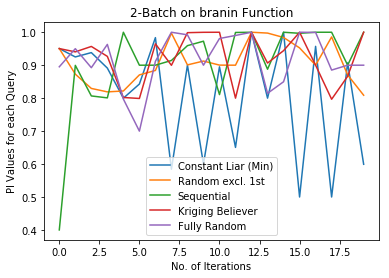

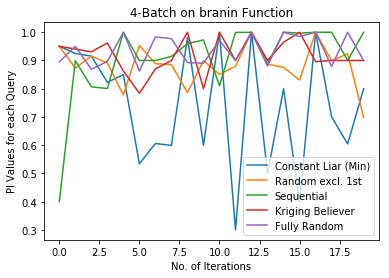

In [9]:
import numpy as np
import seaborn as sns
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

seed_size = 10
batch_sizes = [2,4]
test_funcs = ["branin"]
save_file = False

plot_choice_PI = {
        "seq_results": 1, 
        "random_results": 1,
        "random1_results": 1,
        "kb_results": 1,
        "cl_mean_results": 0, 
        "cl_min_results": 1,
        "cl_max_results": 0
        }

aggr_seed = "mean"

def cumulative_PI_score(func = "egg", seed_size = 2, batch = False, batch_size = 2, heuristic = "sequential", aggr_seed = aggr_seed):
    # Calculates cumulative PI score of all queries, which is an indication of 'exploitative-ness'
    all_seed_PI = np.array([])
    
    for i in range(seed_size):
        if batch == False:
            dir_name = "Exp_Data/" + func + "," + str(seed_size) + "_seed,sequential" + \
            + str(i) + "_seed/"
            filename = dir_name + "sequential,intermediate_vars.pickle"
        
        else:
            dir_name = "Exp_Data/" + func + ',' + str(seed_size) + '_seed,' + str(batch_size) + '_batch_size/' \
            + str(i) + "_seed/"
            file_name = dir_name + heuristic + ',intermediate_vars.pickle'
        
        with open(file_name, 'rb') as f:  # Python 3: open(..., 'rb')
            pickle_dict = pickle.load(f)
            PI_score = pickle_dict['PI_values']
                       
            # Sequential: self.full_PI_value[:, k] = PI_value
            # Batch: self.full_PI_value[batch number, number within batch, :]
            if batch == True: # If batch, reshape into sequantial format
                PI_score = PI_score.reshape(PI_score.shape[-1], -1)
                
        if all_seed_PI.shape == (0,):
            all_seed_PI = PI_score
        else:
            all_seed_PI = np.vstack((all_seed_PI, PI_score))
            
    if aggr_seed == "mean":
        return np.mean(all_seed_PI, axis = 0)

    if aggr_seed == "median":
        return np.median(all_seed_PI, axis = 0)

def plot_cumulative_PI_score(seed_size, batch_sizes, test_funcs, plot_choice, save_file):
    # Loads, plots and saves graphs     
    for batch_size in batch_sizes:
        plt.figure() # New figure
        for func in test_funcs:
            try:
                seq_results = cumulative_PI_score(batch = False, func = func, batch_size = batch_size, seed_size = seed_size)   
            except: pass
            try:
                random_results = cumulative_PI_score(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "random")
            except: pass
            try:
                random1_results = cumulative_PI_score(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "random_except_1st")
            except: pass
            try:
                kb_results = cumulative_PI_score(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "kb")
            except: pass
            try:
                cl_mean_results = cumulative_PI_score(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "cl-mean")
            except: pass
            try:
                cl_min_results = cumulative_PI_score(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "cl-min")
            except: pass
            try:
                cl_max_results = cumulative_PI_score(func = func, batch = True, batch_size = batch_size, seed_size = seed_size, heuristic = "cl-max")
            except: pass
            
            no_iterations = seq_results.shape[0]
            
            for key, value in plot_choice.items():
                if value == 1:
                    
                    # fig = sns.lineplot(x = 'iters', y = 'values', data = eval(key), err_style = "band", label = label_lookup[key])
                    fig = sns.lineplot(x = np.arange(no_iterations), y = eval(key), label = label_lookup[key], estimator = estimator)
            
            graph_title = str(batch_size) + "-Batch on "+ str(func) + " Function " + "(" + str(aggr_seed) + ", " + \
            str(seed_size) + " seed)" 
            ""
            fig.set(xlabel = "No. of Iterations", ylabel = "PI Values for each Query", title = graph_title)
            
            save_path = "Exp_Data/Graphs/" + graph_title + ".png"
            fig2 = fig.get_figure()
            if save_file:
                print("Saved as: " + save_path)
                fig2.savefig(save_path)

plot_cumulative_PI_score(seed_size, batch_sizes, test_funcs, plot_choice_PI, save_file)

Table Form, saved as CSV

- Not yet finished

In [12]:
def single_PI_score(func = "branin", seed_size = 30, batch = False, batch_size = 2, heuristic = "sequential"):
    # Calculates cumulative PI score of all queries, which is an indication of 'exploitative-ness'
    all_seed_PI = np.array([])
    
    for i in range(seed_size):
        if batch == False:
            dir_name = "Exp_Data/" + func + "," + str(seed_size) + "_seed,sequential" + \
            + str(i) + "_seed/"
            filename = dir_name + "sequential,intermediate_vars.pickle"
        
        else:
            dir_name = "Exp_Data/" + func + ',' + str(seed_size) + '_seed,' + str(batch_size) + '_batch_size/' \
            + str(i) + "_seed/"
            file_name = dir_name + heuristic + ',intermediate_vars.pickle'
        
        try: # in case file does not exist, return 0
            with open(file_name, 'rb') as f:  # Python 3: open(..., 'rb')
                pickle_dict = pickle.load(f)
                PI_score = pickle_dict['PI_values']

                # Sequential: self.full_PI_value[:, k] = PI_value
                # Batch: self.full_PI_value[batch number, number within batch, :]
                if batch == True: # If batch, reshape into sequantial format
                    PI_score = PI_score.reshape(PI_score.shape[-1], -1)
        except:
            print(file_name + " not found.")
            return 0, 0

        if all_seed_PI.shape == (0,):
            all_seed_PI = PI_score
        else:
            all_seed_PI = np.vstack((all_seed_PI, PI_score))
            
    mean_results = np.mean(all_seed_PI)
    median_results np.median(all_seed_PI)
    
    return mean_results, median_results

def all_PI_score(test_funcs, batch_sizes, seed_size = 30):
    for current_batch_size in batch_sizes:
        for func in test_funcs:
            seq_mean, seq_median = single_PI_score(func = func, seed_size = seed_size, batch = False)
            kb_mean, kb_median = single_PI_score(func = func, seed_size = seed_size, batch = True, batch_size = 
                                                current_batch_size, heuristic = "kb")
            
cumulative_PI_score_table()

0.9418269399964606

# Consecutive x's distances 

# Plotting Benchmark Functions

To-do:
- 2D/3D plots of functions (with actual min, past queries)
- Plot current GP model after n queries
- Heatmap for acq func values (for all heuristics)

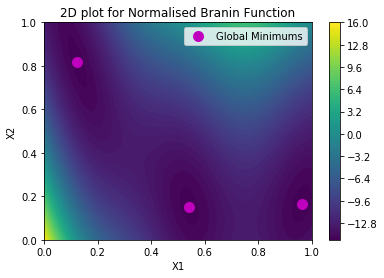

<Figure size 432x288 with 0 Axes>

In [21]:
from Test_Funcs import egg,hartmann,branin
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

funcs = {
    "branin": branin,
    "egg": egg,
    "hartmann": hartmann
}

# Minimum y value
min_y_dict = {
    "hartmann": np.array([-18.22368011]),
    "egg": np.array([-9.596407]),
    "branin": np.array([-14.96021125])
}

# Minimiser x value
min_x_dict = {
    "hartmann": np.array([[0.20169, 0.150011, 0.476874, 0.275332, 0.311652, 0.6573]]),
    "egg": np.array([[1.0, 0.7895]]),
    "branin": np.array([[0.1239, 0.8183],[0.5428, 0.1517],[0.9617, 0.1650]])
}

# Dimensions
dim_dict = {
    "hartmann": 6,
    "egg": 2,
    "branin": 2    
}

graph_title3 = {
    "egg": "3D plot for Normalised Egg Function",
    "branin": "3D plot for Normalised Branin Function"
}

graph_title = {
    "egg": "2D plot for Normalised Egg Function",
    "branin": "2D plot for Normalised Branin Function"
}

def plot_contour_2d(selected_func, past_x = np.array([]), no_queries = 20):
    """ 
    Plots and saves 2d plots
    Past_x and no_queries: plots query record
    """
    x_min = min_x_dict[selected_func]
    func = funcs[selected_func]
    
    x1 = np.linspace(0.0, 1.0, 100)
    x2 = np.linspace(0.0, 1.0, 100)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.hstack((X1.reshape(100*100,1),X2.reshape(100*100,1)))
    Y = func(X)
    
    plt.figure()    
    plt.contourf(X1, X2, Y.reshape((100,100)),100)
    if (len(x_min)>1):    
        plt.plot(np.array(x_min)[:,0], np.array(x_min)[:,1], 'm.', markersize=20, label='Global Minimums')
    else:
        plt.plot(x_min[0][0], x_min[0][1], 'm.', markersize=20, label='Global Minimum')
    plt.legend()
    plt.colorbar()
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(graph_title[selected_func])
    
    if past_x.shape != (0,): # Means we have query record
        lons = past_x[:no_queries,0]
        lats = past_x[:no_queries,1]
        vals = np.arange(lons.shape[0])
        plt.scatter(lons, lats, c=vals, cmap='afmhot')  
        plt.colorbar()
        savepath = "Exp_Data/Graphs/2d_queries_" + selected_func + ".png"
    else:
        savepath = "Exp_Data/Graphs/2d_contour_" + selected_func + ".png"
        
    plt.show()
    plt.savefig(savepath)
    
plot_contour_2d("branin")

In [22]:
# Helper functions

def load_pickle(seed_size, current_seed, func, batch, heuristic, batch_size, target_val):
    if batch == False:
        dir_name = "Exp_Data/" + func + "," + str(seed_size) + "_seed,sequential/" \
        + str(current_seed) + "_seed/"
        file_name = dir_name + "sequential,intermediate_vars.pickle"

    else:
        dir_name = "Exp_Data/" + func + ',' + str(seed_size) + '_seed,' + str(batch_size) + '_batch_size/' \
        + str(current_seed) + "_seed/"
        file_name = dir_name + heuristic + ',intermediate_vars.pickle'
    
    with open(file_name, 'rb') as f:  # Python 3: open(..., 'rb')
        pickle_dict = pickle.load(f)
        value = pickle_dict[target_val]
    print(file_name)
    print(value.shape)
    return value

def load_pickle_x(seed_size, seed, func, batch, heuristic, batch_size):
    """ 
    Loads past querie, excluding initial points
    Returns array of x1 and x2
    """
    loaded_x = load_pickle(seed_size, seed, func, batch, heuristic, batch_size, "X")
    if func == "hartmann":
        init_x = 6
    else:
        init_x = 3
    
    x = loaded_x[3:,:]

    return x

Exp_Data/egg,30_seed,sequential/0_seed/sequential,intermediate_vars.pickle
(51, 2)


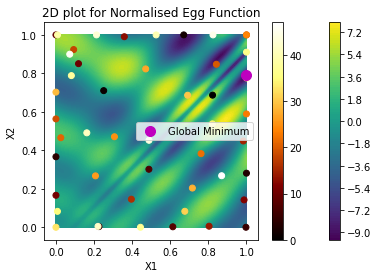

Exp_Data/egg,30_seed,sequential/1_seed/sequential,intermediate_vars.pickle
(51, 2)


<Figure size 432x288 with 0 Axes>

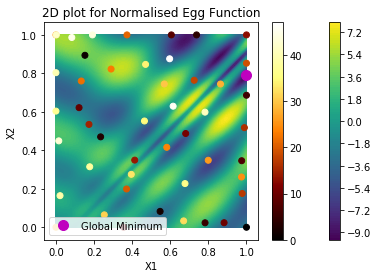

Exp_Data/egg,30_seed,sequential/2_seed/sequential,intermediate_vars.pickle
(51, 2)


<Figure size 432x288 with 0 Axes>

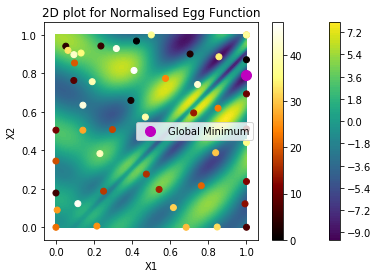

Exp_Data/egg,30_seed,sequential/3_seed/sequential,intermediate_vars.pickle
(51, 2)


<Figure size 432x288 with 0 Axes>

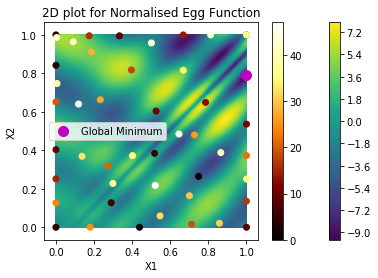

Exp_Data/egg,30_seed,sequential/4_seed/sequential,intermediate_vars.pickle
(51, 2)


<Figure size 432x288 with 0 Axes>

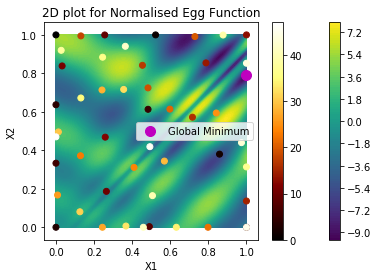

<Figure size 432x288 with 0 Axes>

In [27]:
selected_func = "egg"

for i in range(5):
    past_x = load_pickle_x(seed_size = 30, seed = i, func = selected_func, batch = False, heuristic = "cl-min", batch_size = 2)
    plot_contour_2d(selected_func, past_x, 50)

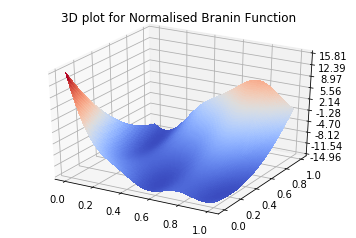

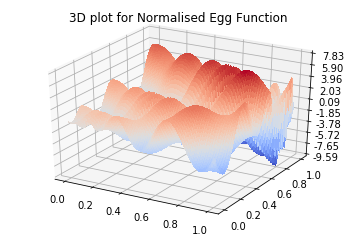

In [8]:
def plot_contour_3d(selected_func):
    """ Plots and saves 3d plot"""
    x_min = min_x_dict[selected_func]
    func = funcs[selected_func]
    
    x1 = np.linspace(0.0, 1.0, 100)
    x2 = np.linspace(0.0, 1.0, 100)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.hstack((X1.reshape(100*100,1),X2.reshape(100*100,1)))
    Y = func(X)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X1, X2, Y.reshape((100,100)), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_title(graph_title3[selected_func])
    
    savepath = "Exp_Data/Graphs/3d_contour_" + selected_func + ".png"
    fig = ax.get_figure()
    fig.savefig(savepath)
    
plot_contour_3d('branin')
plot_contour_3d('egg')

In [114]:
x0 = load_pickle(3, 0, "branin", True, "kb", 2, "X")
x1 = load_pickle(3, 1, "branin", True, "kb", 2, "X")

Exp_Data/branin,3_seed,2_batch_size/0_seed/kb,intermediate_vars.pickle
Exp_Data/branin,3_seed,2_batch_size/1_seed/kb,intermediate_vars.pickle


In [115]:
x0 == x1

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [False, False],
       [False, False],
       [ True,  True],
       [ True,  True],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

In [29]:
x1 = y[:,0]

In [34]:
x1.shape

(800,)